# Machine Learning: Aprendizaje supervisado

**Machine Learning:**

El machine Learning o aprendizaje automático consiste básicamente en automatizar, mediante distintos algoritmos, la identificación de patrones o tendencias que se “esconden” en los datos. Es una rama de la inteligencia artificial que empezó a cobrar importancia a partir de los años 80. Se trata de un tipo de IA que ya no depende de unas reglas y un programador, sino que la computadora puede establecer sus propias reglas y aprender por sí misma.

El objetivo del machine learning es crear un modelo que nos permita resolver una tarea dada. Luego se entrena el modelo usando gran cantidad de datos. El modelo aprende de estos datos y es capaz de hacer predicciones. Es, por lo tanto, un proceso de inducción del conocimiento, es decir, un método que permite obtener por generalización un enunciado general a partir de enunciados que describen casos particulares. Según la tarea que se quiera realizar, será más adecuado trabajar con un algoritmo u otro.

Los tipos de implementación de machine Learning pueden clasificarse en tres categorías diferentes:

- Aprendizaje supervisado
- Aprendizaje no supervisado
- Aprendizaje de refuerzo según la naturaleza de los datos que recibe.

**Aprendizaje supervisado:**

En el aprendizaje supervisado, los algoritmos trabajan con datos etiquetados (labeled data), intentado encontrar una función que, dadas las variables de entrada (input data), les asigne la etiqueta de salida adecuada. El algoritmo se entrena con un histórico de datos y así aprende a asignar la etiqueta de salida adecuada a un nuevo valor, es decir, predice el valor de salida.

El aprendizaje supervisado se suele usar en:

- Problemas de clasificación (identificación de dígitos, diagnósticos, o detección de fraude de identidad)
- Problemas de regresión (predicciones meteorológicas, de expectativa de vida, de crecimiento etc)

Los algoritmos más habituales que aplican para el aprendizaje supervisado son:

- Regresión lineal
- Regresión logística
- K nearest neighbourhoods - KNN
- Árboles de decisión y random forests
- Clasificación de Naïve Bayes
- Support Vector Machines (SVM)
- Métodos Ensemble (Conjuntos de clasificadores)

# 1. Metodología de trabajo en machine learning

## 1.1. Conjuntos de test y entrenamiento

Una práctica habitual dentro del ámbito del aprendizaje automático, es dividir el fichero en dos subconjuntos. El primero de ellos será para el entrenamiento del modelo, cuyo tamaño suele comprender entre el 70-80% del dataset, y el segundo para testear el modelo obtenido a partir de los datos de entrenamiento.

Esta práctica trata de eliminar los problemas de overfitting o sobreajuste que tendrían lugar si utilizasemos todo el dataset como conjunto de entrenamiento.

Para dividir un dataset en conjunto de test y en conjunto de entrenamiento, podemos utilizar la función `.train_test_split(inputs, outputs, test_size, random_state)` de la librería `scikit-learn`.

- `inputs`: variables predictoras $X$
- `outputs`: variable dependiente $y$
- `test_size`: % del dataset que se va a utilizar como subconjunto de test
- `random_state`: seed de los número aleatorios, este parámetro es opcional, pero permite que siempre se obtengan los mismo números aleatorios.

```python
# train_test_split snippet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```

<center><img src="../_images\ml_train_test.png" alt="Drawing" style="width: 300px;"/></center>

## 1.2. Cross validation

En el punto anterior se explica la división de un dataset en un conjunto de entrenamiento y otro de test para evaluar la bondad de ajuste del modelo. Como esta división se realiza mediante número aleatorios, podemos obtener un resultado diferente cada vez que se ejecuta. La validación cruzada (*cross validation*) es una técnica utilizada para evaluar que los resultados del análisis estadístico son independientes de las particiones entre subconjuntos de test y entrenamiento.

Esta técnica divide un dataset en subconjunto de test y entrenamiento de $k$ formas diferentes, y para cada una de estas formas calcula todos los parámetros. Por último se hace la media aritmética de los parámetros de cada validación, y se obtiene una media de los datos. Este método disminuye errores en la estimación de parámetros de cada modelo, y minimiza otras casuísticas como el overfitting.

Dentro del método de validación cruzada, en función del número $k$ en el que dividamos el dataset podemos definir 3 métodos:

- k = 1: validación cruzada simple
- k = 5-10: K-fold cross validation
- k = n: Leave One Out Cross Validation (LOOCV)

<center><img src="../_images\ml_cross_validation.png" alt="Drawing" style="width: 350px;"/></center>

En función del valor de $k$, podremos experimentar una compensación del sesgo-varianza, teniendo para valores de $k$ muy elevadas, modelos con un sesgo bajo pero con una varianza muy elevada, es decir overfitting. En bibliografía de referencia como *An Introduction to Statistical Learning*, se recomienda utilizar el método k-fold cross validation.

```Python
# cross validation score snippet
from sklearn.model_selection import cross_val_score
clf_kn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(clf_kn, X, y, cv=5, scoring='accuracy').mean()
```

# 2. Algoritmos de regresión

En este punto se van a estudiar tres algoritmos de regresión, algunos de ellos son exclusivos del ámbito de la regresión como la regresión linea, mientras que otros como k-NN permite se puede aplicar tanto en regresiones como clasficaciones modificando ligeramente algunos parámetros del modelo.

En este apartado se va a estudiar:

- Regresión lineal
- k-NN para regresión
- Árboles de decisión para regresión

Para entrenar los modelos se va a trabajar con un dataset que contiene información del precio de diferentes viviendas, en función de características de las mismas como su superficie, número de habitaciones...etc.

In [14]:
# Módulos de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Carga de datos
url = "https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv"
df = pd.read_csv(url)

# Variable superficie total
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Máscara casas menores de 6000 sqft
df = df[df["TotalSF"]<6000]

In [16]:
# Preparación datos
X = df[['TotalSF']]   # pandas DataFrame
y = df['SalePrice']   # pandas Series

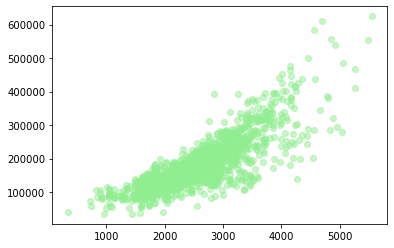

In [17]:
# Precio vivienda en función del número de sqft (squared feets)
plt.scatter(X, y, c='lightgreen', alpha=0.5);

Para evaluar como se ajustan los modelos a los datos y analizar qué modelo tiene una mayor bondad de ajuste, los algoritmos de regresión suele utilizar las siguientes métricas:

- MAE and MAPE
- MSE and RMSE
- Correlation and Bias

## 2.1. Regresión lineal

En estadística, la regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable independiente $x$, y la variable dependiente $y$. Este modelo asume que existe una relación lineal entre la variable $x$ y la varible $y$, más un término denominado error aleatorio que sigue una distribución normal de media cero, $\epsilon$ ~ $N(0,\sigma)$. Matemáticamente se puede expresar como:

$$ y = f(x) + \epsilon = \alpha + \beta  x + \epsilon $$

Una vez se ha analizado la correlación de dos variables, el siguiente paso es obtener el modelo de predicción de de $y$ en base a $x$. En la primera ecuación encontramos que existen dos parámetros desconocidos, $\alpha$ (intercepto u ordenada en el origen) y $\beta$ (pendiente), que será necesario estimar. Una vez utilicemos nuestro data set de entrenamiento para obtener el valor de estos coeficientes, podremos predecir un valor $\hat{y}$ en base a la variable $x$.

$$ \hat{y} = \hat{f}(x) = \hat{\alpha} + \hat{\beta} x $$

Existen modelos en los que a veces no es suficiente el uso de una variable independiente $x$ para predecir una variable independiente $y$, es en estos casos donde entra en juego la regresión lineal múltiple, donde se tienen en cuenta un número $p$ de variables.

$$ y = f(x) + \epsilon = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_p x_p + \epsilon $$

Al igual que en el caso de la regresión lineal, estos coeficiente son desconocidos y tendrán que ser estimados para poder definir el modelo de predicción de la variable $\hat{y}$.

$$ \hat{y} = \hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1  x_1 + \hat{\beta}_2  x_2 + ... + \hat{\beta}_p x_p $$

Para estimar estos coeficientes se utiliza el método de los mínimos cuadrados, el cual trata de reducir para cada puntos el residuo, i.e., reducir la suma de los cuadrados de los residuos $RSS$. Dado que en la regresión lineal múltiple existen más variables, será necesario emplear métodos matriciales para hallar analíticamente los coeficientes.

\begin{align}
Y = X \beta + \epsilon\qquad\rightarrow\qquad
\begin{bmatrix}y_1\\y_2\\...\\y_n\end{bmatrix} =
\begin{bmatrix}1&x_{11}&x_{12}&...&x_{1p}\\
1&x_{21}&x_{22}&...&x_{2p}\\
...&...&...&...&...\\
1&x_{n1}&x_{n1}&...&x_{np}\end{bmatrix}\
\begin{bmatrix}\beta_o\\\beta_1\\\beta_2\\...\\\beta_p\end{bmatrix} +
\begin{bmatrix}\epsilon_1\\\epsilon_2\\...\\\epsilon_n\end{bmatrix}
\end{align}

\begin{align}
\beta = (X^TX)^{-1}X^TY
\end{align}

Estos coeficientes se pueden obtener de forma analítica mediante el método de los mínimos cuadrados, o de forma iterativa mediante el uso del algoritmo del gradiente descendente.

**Regresión lineal con sklearn:**

In [61]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [62]:
# 1 - Cargar las librerías scikit-learn
from sklearn.linear_model import LinearRegression

# 2 - Crear una instancia
reg_lin = LinearRegression()

# 3 - Entrenar el modelo
reg_lin.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_lin.predict(X_test)

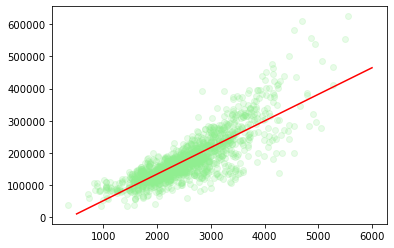

In [63]:
# Graficar el modelo
x_hip = np.linspace(500, 6000)
y_hip = reg_lin.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.2)
plt.plot(x_hip, y_hip, c='red');

In [64]:
reg_lin.coef_, reg_lin.intercept_

(array([82.67175649]), -31221.81255650008)

In [65]:
# Cargar métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 33687.645424627175
mape score is 0.19356658499843452
mse score is 2339540330.971256
rmse score is 48368.795012603485
r2 score is 0.7077187597146779


También se puede evaluar el comportamiento de un modelo mediante validación cruzada, y definiendo una métrica de evaluación.

In [81]:
# Load the library
from sklearn.model_selection import cross_val_score

# We calculate the metric for several subsets (determine by cv, between 5 and 10)
cross_val_score(reg_lin, X, y, cv=5, scoring="neg_mean_absolute_error").mean()

-31053.225860573915

## 2.2. K Vecinos cercanos

En machine learning, un método sencillo de clasificación y regresión es el de los $k$ vecinos más cercanos (en inglés *K-nearest neighbors*, k-NN). Se usará la notación $NN(k, x_\varphi)$ para denotar el conjunto de los $k$ vecinos más cercanos al objeto $x_\varphi$.

En la regresión por k-NN, la salida es un valor de un atributo del objeto; ese valor se puede calcular usando el promedio de los valores de los $k$ vecinos. La palabra cercano implica una métrica de la distancia, ya que este método está basado en la distancia existente entre el objeto $x_\varphi$ y sus $k$ vecinos más cercanos. Típicamente se puede usar la distancia Euclidiana, aunque también podemos encontrar otras métricas como la distancia Manhattan (o taxi), o la de Minkowski.

**Distancia Euclidea:**

La distancia euclídea entre dos puntos $x_i$ y $x_j$ se define como la longitud del segmento que une ambos puntos. En coordenadas cartesianas, la distancia euclídea se calcula empleando el teorema de Pitágoras. Su fórmula es:

\begin{align}
D_1(x_i, x_j) =\sqrt{(x_{i1}-x_{j1})^2+(x_{i2}-x_{j2})^2+...+(x_{in}-x_{jn})^2}=\sqrt{\sum_{k=1}^{n} (x_{ik}-x_{jk})^2}
\end{align}

Es común normalizar los datos de cada una de las dimensiones del objeto, para evitar que un cambio en la escala en alguna de las dimensiones, afecte el resultado.

**Principales parámetros del modelo:**

- *n_neighbors*: número $k$ de vecinos

**k-NN con sklearn:**

In [101]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [102]:
# 1 - Cargar las librerías scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# 2 - Crear una instancia
reg_kn = KNeighborsRegressor(n_neighbors=10)    # Hay que definir número de vecinos

# 3 - Entrenar el modelo
reg_kn.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_kn.predict(X_test)

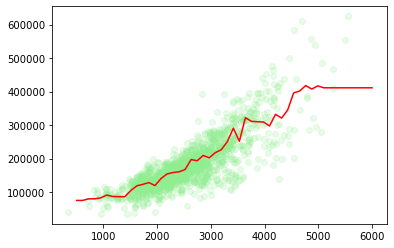

In [103]:
x_hip = np.linspace(500, 6000, 1000)
y_hip = reg_kn.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.2)
plt.plot(x_hip, y_hip, c='red');

In [104]:
# Load the scorers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 34294.6301369863
mape score is 0.17894646095824682
mse score is 2451999192.0726027
rmse score is 49517.66545458906
r2 score is 0.6936691556242321


Este modelo necesita definir un parámetro cuando se modeliza. Para obtener el valor del parámetro que consigue una mejor bondad de ajuste del modelo, se pueden probar diferentes valores y e ir monitorizando una métrica para visualizar en que punto se obtiene el modelo mejor ajustado. 

In [105]:
# Método del codo
res = []

for n in np.arange(2, 30):
    reg_kn = KNeighborsRegressor(n_neighbors=n)
    res.append(cross_val_score(reg_kn, X, y, cv=10, scoring="neg_mean_absolute_error").mean())

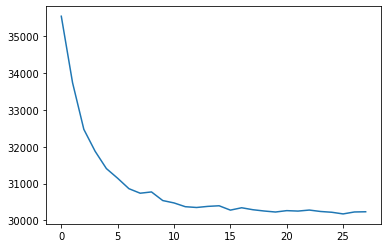

In [106]:
# Número óptimo de vecinos es aproximadamente 13
plt.plot(-np.array(res));

Otra forma de calcular los mejores parámetros es mediante la función `GridSearchCV` de `sklearn`. Esta función ejecuta un modelo bajo un rango de parámetros definidos por el usuario, y para cada uno de ellos analiza una serie de métricas, devolviendo como resultado los mejores parámetros para el modelo.

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

reg_kn = GridSearchCV(
    KNeighborsRegressor(),
    param_grid={"n_neighbors": np.arange(2,50)}
)

# Fit will test all of the combinations
reg_kn.fit(X, y);

In [108]:
reg_kn.best_estimator_

KNeighborsRegressor(n_neighbors=25)

In [109]:
reg_kn.best_params_

{'n_neighbors': 25}

## 2.3. Árboles de decisión

Los métodos de machine learning basados en árboles comprenden un conjunto de técnicas de aprendizaje supervisado no parmétricas, que permiten segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones y predecir la variable respuesta. Dado que el conjunto de reglas de división utilizadas para segmentar el espacio predictor se puede resumir en un árbol, este tipo de efoques se conocen como métodos de árboles de decisión.

Aunque los métodos basados en árboles de decisión simples tienen ventajas como la simplicidad y la interpretabilidad, no son competitivos en cuanto a precisión si los comparamos con otros enfoques. Es por esto que en este notebook también veremos otros algoritmos basados en árboles como `bagging`, `random forests` o `boosting`. Estos métodos mejoran el desempeño de los árboles simples combinando varios de ellos, a costa de perder interpretabilidad.

Aunque el porcentaje mayoritario de aplicación es el campo de la clasificación, también se pueden emplear en regresiones de variables continuas.

La interpretación geométrica de estos modelos es sencillamente intuitiva, y consiste en ir dividiendo el espacio en rectángulos, donde todos las observaciones contenidas dentro del mismo rectángulo, tendrán el mismo valor de salida.

<center><img src="../_images\ml_reg_tree.png" alt="Drawing" style="width: 600px;"/></center>

En el caso de regresión, en lugar de usar Gini como medida de impureza, se utiliza el MSE (*mean square error*), el error cuadrático medio.

**Principales parámetros del modelo:**

- *max_depth*: máxima profundidad, crea $2^n$ divisiones
- *min_sample_leaf*: mínimo número de muestras por hoja
- *min_samples_split*: mínimo número de muestras por nodo para subdividirse

**Árboles de decisión con sklearn:**

In [6]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [8]:
# 1 - Cargar las librerías scikit-learn
from sklearn.tree import DecisionTreeRegressor

# 2 - Crear una instancia
reg_dt = DecisionTreeRegressor(max_depth=3)

# 3 - Entrenar el modelo
reg_dt.fit(X_train, y_train)

# 4 - Predicción
y_pred = reg_dt.predict(X_test)

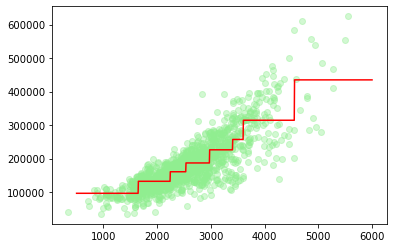

In [9]:
x_hip = np.linspace(500, 6000, 1000)
y_hip = reg_dt.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.4)
plt.plot(x_hip, y_hip, c='red');

En la imagen anterior se puede apreciar que para una profundidad máxima de 3, se producen $2^3=8$ divisiones diferentes.

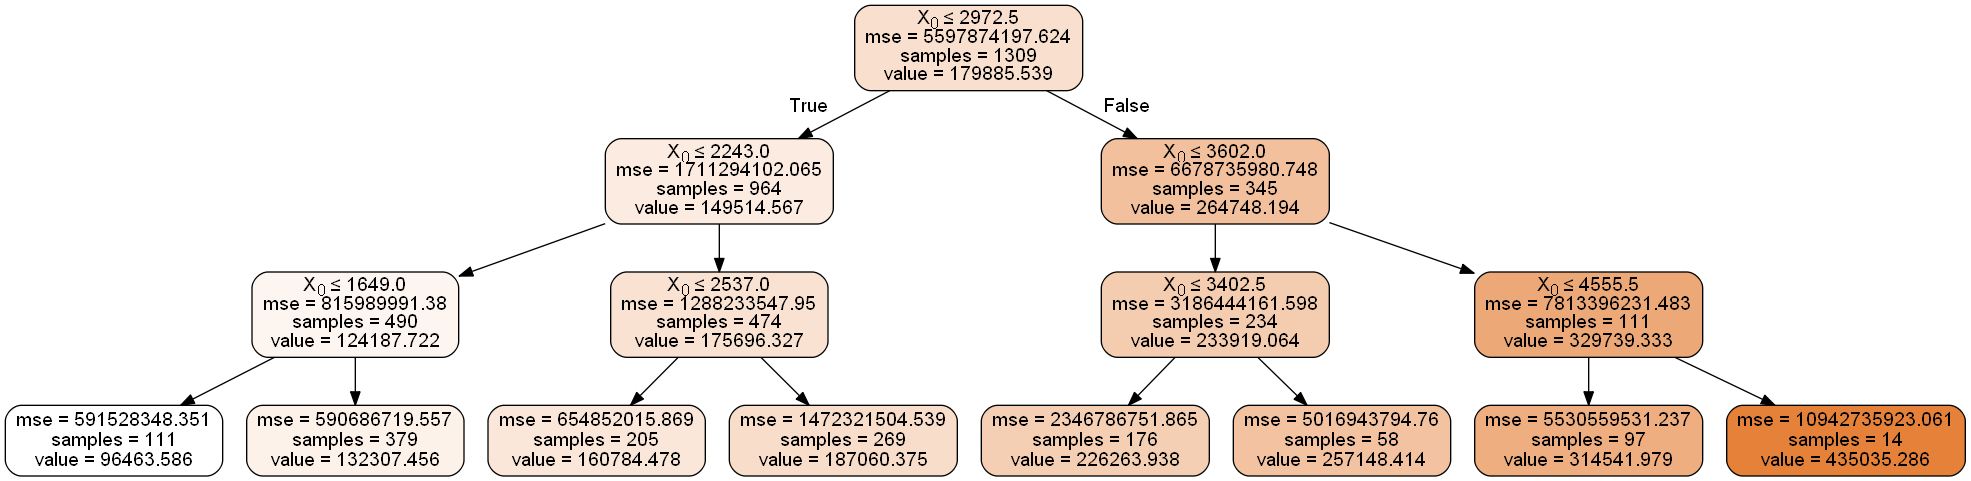

In [13]:
# Graficar un árbol de decisión
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

dot_data = StringIO()

export_graphviz(reg_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [127]:
# Load the scorers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 31037.307945205474
mape score is 0.16022258471320525
mse score is 2116770659.6697643
rmse score is 46008.37597296567
r2 score is 0.7355496096316454


In [130]:
# Buscar mejor max_depth y min_sample_leaf

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

reg_dt = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid={"max_depth": np.arange(3, 10), 
                "min_samples_leaf": np.arange(20, 100, 1000)}
)

# Fit will test all of the combinations
reg_dt.fit(X, y)

reg_dt.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

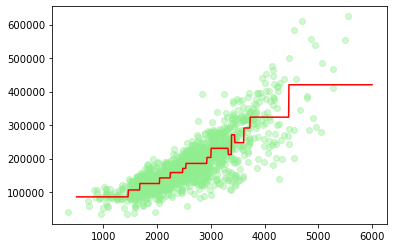

In [131]:
x_hip = np.linspace(500, 6000, 1000)
y_hip = reg_dt.predict(pd.DataFrame(x_hip))

plt.scatter(X, y, c='lightgreen', alpha=0.4)
plt.plot(x_hip, y_hip, c='red');

# 3. Algoritmos de clasificación

En este apartado se va a estudiar:

- Regresión logística
- k-NN para clasificación
- Árboles de decisión para clasificación
- SVM - Support Vector Machines
- Ensemble methods: random forests bagging & random forests boosting

Para entrenar los modelos se va a trabajar con un dataset que contiene información recogida por un sensor de un coche que informa sobre el grado de irregularidad de una carretera y de la inclinación. El objetivo es inferir mediante estas dos variables si el conductor iba rápido o no.

In [19]:
# Módulos de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Carga de datos
url = "https://raw.githubusercontent.com/rezpe/datos_viz/master/terrain.csv"
df = pd.read_csv(url)

df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


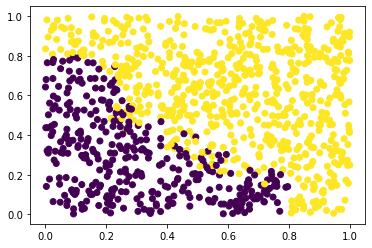

In [21]:
# Gráfica
plt.scatter(df['bumpiness'], df['grade'], c=df['target']);

In [22]:
# Preparación de datos
X = df[["bumpiness", "grade"]]     # Pandas DataFrame
y = df["target"]                   # Pandas Series

In [24]:
# Función para graficar los diferentes modelos
def draw(clf, X, y, h=0.05):
    
    plt.figure(figsize=(6, 6))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05
    y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

Para evaluar como se ajustan los modelos a los datos y analizar qué modelo tiene una mayor bondad de ajuste, los algoritmos de clasificación suelen utilizar las siguientes métricas:

- Accuracy
- Precision and Recall
- ROC-AUC Curve

## 3.1. Regresión logística

La regresión logística es un método supervisado de clasificación que está basado en la regresión lineal. El objetivo de este método es obtener a partir de una serie de predictores que pueden tomar cualquier rango de valores, una predicción de tipo dicotómica (clasificación).

Aunque es un método de clasificación, está basado en la regresión lineal, por lo que para llevar a cabo este modelo es necesario tranformar la ecuación de regresión. Esta transformación permite obtener como resultado una variable con un valor binario en vez de un valor cuantitativo continuo.

Indicar que aunque es un método de clasificación con un resultado binario, la regresión logística lo que en verdad indica es la probabilidad de pertenecer a un grupo u otro, y en base a esa probabilidad podremos establecer un umbral (*threshold*) que defina a que clase pertenece cada observación.

$$ P = \hat{y} = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}} $$

Tenemos por lo tanto una predicción que sigue la forma de una función denominada logística o sigmoide. Para esta función, cuando los valores de $x$ son muy grandes, el término $e^{-(\beta_0 + \beta_1 x)}$ tiende a 0, por lo que la probabilidad o predicción tenderá a 1; y en caso de que el denominador sea pequeño, la función tenderá a 0.

<center><img src="../_images\ml_clf_logreg.png" alt="Drawing" style="width: 400px;"/></center>

**Regresión logística con sklearn:**

In [26]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [34]:
# 1 - Cargar las librerías scikit-learn
from sklearn.linear_model import LogisticRegression

# 2 - Crear una instancia
clf_lr = LogisticRegression()

# 3 - Entrenar el modelo
clf_lr.fit(X_train, y_train)

# 4 - Predicción
y_pred = clf_lr.predict(X_test)

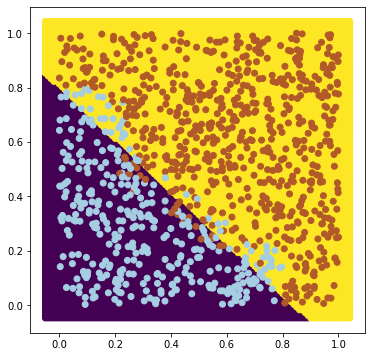

In [28]:
draw(clf_lr, X.values, y.values, 0.01)

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_lr, X, y, cv=5, scoring='accuracy').mean()

0.9289999999999999

## 3.2. K Vecinos cercanos

En machine learning, un método sencillo de clasificación y regresión es el de los $k$ vecinos más cercanos (en inglés *K-nearest neighbors*, k-NN). Se usará la notación $NN(k, x_\varphi)$ para denotar el conjunto de los $k$ vecinos más cercanos al objeto $x_\varphi$.

En la clasificación por k-NN, la salida es el valor que contengan la mayoría de vecinos, para evitar empates, se suele utilizar un número impar $k$ de vecinos.

**k-NN con sklearn:**

In [38]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [39]:
# 1 - Cargar las librerías scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# 2 - Crear una instancia
clf_kn = KNeighborsClassifier(n_neighbors=5)

# 3 - Entrenar el modelo
clf_kn.fit(X_train, y_train)

# 4 - Predicción
y_pred = clf_kn.predict(X_test)

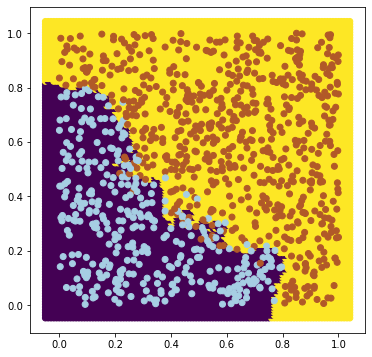

In [42]:
draw(clf_kn, X.values, y.values, 0.01)

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_kn, X, y, cv=5, scoring='accuracy').mean()

0.9380000000000001

In [44]:
# Buscar mejor n_neighbors

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

clf_kn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={"n_neighbors": np.arange(1,30)}
)

# Fit will test all of the combinations
clf_kn.fit(X, y)

clf_kn.best_params_

{'n_neighbors': 16}

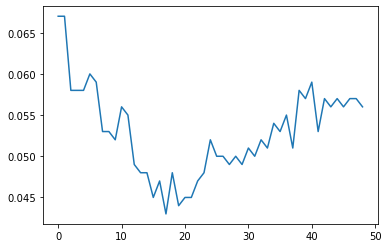

In [46]:
from sklearn.neighbors import KNeighborsClassifier

res = []

for n in np.arange(1, 50):
    clf = KNeighborsClassifier(n_neighbors=n)
    res.append(cross_val_score(clf, X, y, cv=10, scoring="neg_mean_absolute_error").mean())

plt.plot(-np.array(res));

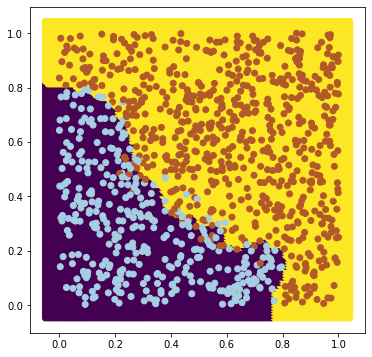

In [45]:
draw(clf_kn, X.values, y.values, 0.01)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_kn = KNeighborsClassifier(n_neighbors=16)

clf_kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [49]:
confusion_matrix(y_test, clf_kn.predict(X_test))

array([[109,   7],
       [  8, 206]], dtype=int64)

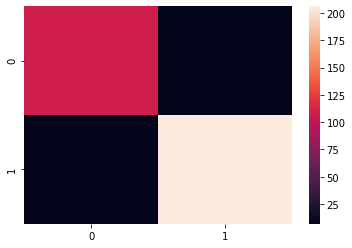

In [50]:
sns.heatmap(confusion_matrix(y_test, clf_kn.predict(X_test)));

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_kn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       116
         1.0       0.97      0.96      0.96       214

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



## 3.3. Support Vector Machines

**Principales parámetros del modelo:**

- *C*:
- *kernel*: linear, rbf, poly

**SVM con sklearn:**

In [52]:
# Buscar mejor params

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf_svm = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid={"C": [0.1, 10, 100],
                "gamma": [10, 100, 1000]}
)

# Fit will test all of the combinations
clf_svm.fit(X, y)

clf_svm.best_params_

{'C': 100, 'gamma': 10}

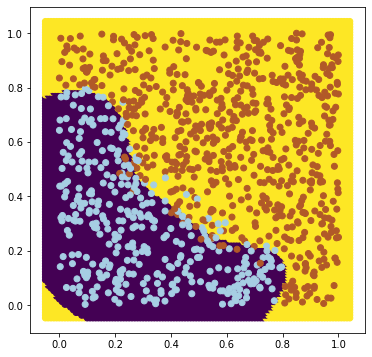

In [53]:
draw(clf_svm, X.values, y.values, 0.01)

In [54]:
# Buscar mejor params

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

clf = GridSearchCV(
    SVC(kernel='poly'),
    param_grid={"C": [0.1, 10, 100],
                "degree": np.arange(2, 8, 2)},
                scoring='accuracy'
)

# Fit will test all of the combinations
clf.fit(X, y)

clf.best_params_

{'C': 10, 'degree': 6}

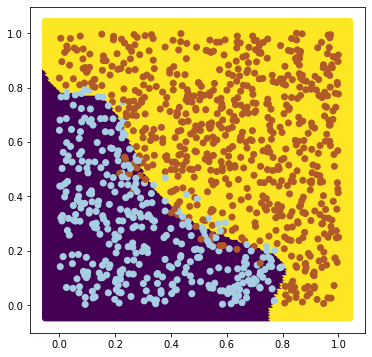

In [55]:
draw(clf, X.values, y.values, 0.01)

## 3.4. Árboles de decisión

En el caso de utilizarse como algoritmo de clasificación, en lugar de utilizar el MSE (*mean square error*) para analizar las posibles divisiones, se utilizan otros indicadores como pueden ser:

**Gini Index:**

Es una medida de la varianza total en el conjunto de las $K$ clases del nodo $m$. Se considera una medida de pureza del nodo.

\begin{align}
G_m = \sum_{k = 1}^K \hat{p}_{mk}(1 - \hat{p}_{mk})
\end{align}

Cuando $\hat{p}_{mk}$ es cercano a 0 o a 1 (el nodo contiene mayoritariamente observaciones de una clase), el término $\hat{p}_{mk}(1 - \hat{p}_{mk})$ es muy pequeño. Como consecuencia, cuanto mayor sea la pureza del nodo, menor será el valor del índice Gini G.

El algoritmo CART (Classification and regression trees) emplea el Gini Index como criterio de división.

**Information Gain - Cross Entropy**:

La entropía es otra forma de cuantificar el desorden de un sistema. En el caso de los nodos, el desorden se corresponde con la impureza.

Si un nodo es puro, contiene únicamente observaciones de una clase, entonces su entropía es cero. Por el contrario, si la frecuencia de cada clase es la misma, el valor de la entropía alcanza el valor máximo de 1.

\begin{align}
D = - \sum_{k = 1}^K \hat{p}_{mk}log(\hat{p}_{mk})
\end{align}

Los algoritmos C4.5 y C5.0 emplean information gain como criterio de división.

**Chi - Square ($\chi^2$)**:

Esta aproximación consiste en identificar si existe una diferencia significativa entre los nodos hijos y el nodo padre, es decir, si hay evidencias de que la división consigue una mejora efectiva. Para ello, se aplica un test estadístico *chi-square goodness of fit* empleando como distribución esperada $H_0$ la frecuencia de cada clase en el nodo parental. Cuanto mayor sea el estadístico $\chi^2$, mayor es la evidencia estadística de que existe una diferencia.

\begin{align}
\chi^2 = - \sum_{k} \frac{(observado_k - esperado_k)^2}{esperado_k}
\end{align}

Los árboles generados con este criterio de división reciben el nombre de CHAID (Chi-square Automatic Interaction Detector).

**Principales parámetros del modelo:**

- *max_depth*: máxima profundidad, crea $2^n$ divisiones
- *min_sample_leaf*: mínimo número de muestras por hoja
- *min_samples_split*: mínimo número de muestras por nodo para subdividirse

**Árboles de decisión con sklearn:**

In [56]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [57]:
# 1 - Cargar las librerías scikit-learn
from sklearn.tree import DecisionTreeClassifier

# 2 - Crear una instancia
clf_dt = DecisionTreeClassifier(max_depth=3)

# 3 - Entrenar el modelo
clf_dt.fit(X_train, y_train)

# 4 - Predicción
y_pred = clf_dt.predict(X_test)

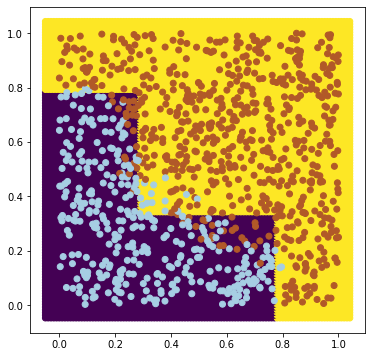

In [59]:
draw(clf_dt, X.values, y.values, 0.01)

In [60]:
# Buscar mejor max_depth y min_sample_leaf

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={"max_depth": np.arange(3, 6), 
                "min_samples_leaf": [50, 100, 200]}
)

# Fit will test all of the combinations
clf_dt.fit(X, y)

clf_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 50}

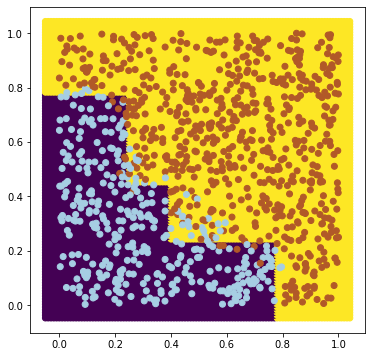

In [62]:
draw(clf_dt, X.values, y.values, 0.01)

## 3.5. Random forests (bagging)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clfr = RandomForestClassifier(max_depth=4, n_estimators=100)

cross_val_score(clfr, X, y).mean()

0.943

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clfr = GridSearchCV(
    RandomForestClassifier(),
    param_grid={"max_depth": np.arange(3, 8), 
                "n_estimators": [50, 100, 200]}
)

# Fit will test all of the combinations
clfr.fit(X, y)

clfr.best_params_

{'max_depth': 5, 'n_estimators': 50}

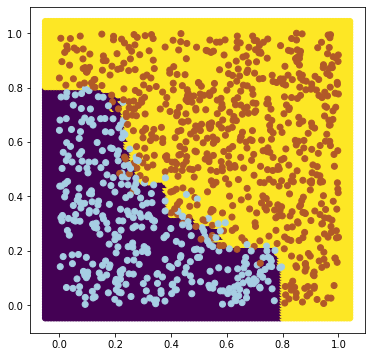

In [67]:
draw(clfr, X.values, y.values, 0.01)

## 3.6. Random forests (boosting)

In [ ]:
# sklearn
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_depth=4, learning_rate=0.1)
cross_val_score(clf, X, y).mean()

In [ ]:
# XGBoost
from xgboost import XGBClassifier

clf = XGBClassifier(max_depth=4, learning_rate=0.1)
cross_val_score(clf, X, y).mean()

In [ ]:
# lightgbm
import lightgbm as lgb 

clf = lgb.LGBMClassifier(max_depth=4, learning_rate=0.1)
cross_val_score(clf, X, y).mean()

# X. Salvar un modelo

# X. Bibliografía

- KSchool Data Science Master Ed. 23.
- https://scikit-learn.org/stable/index.html
- https://empresas.blogthinkbig.com/que-algoritmo-elegir-en-ml-aprendizaje/